In [1]:
import os 
import glob
from pathlib import Path
import pandas as pd 
import numpy as np 
import nibabel as nib 
import json


/working/lupolab/julia/anaconda/envs/pytnew/lib/python3.7/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


## We need to map the segmentations that are named by the T2-FLAIR image to their corresponding patient: 

Begin by reading in the json file and data frames that describe what we just segmented: 

In [2]:
PATH = Path('/working/lupolab/julia/tcia_analysis/datasets/')

In [3]:
df = pd.read_csv(Path(PATH, 'one_exam_per_patient_with_fixed_vol.csv'))

In [4]:
with open(Path(PATH.parent,'nvidia', 'config', 'config_datalist_flair.json'), 'r') as f: 
    segment_json = json.load(f)

In [5]:
segment_json

{'training': [],
 'validation': [{'image': 'TCGA-GBM-nifti/TCGA-06-0240/07-02-2005-04728/4-AxFLAIR-thin_for_surgery-47036.nii.gz'},
  {'image': 'TCGA-GBM-nifti/TCGA-06-0143/02-11-2005-83875/6-AXIAL_FLAIR-72192.nii.gz'},
  {'image': 'TCGA-GBM-nifti/TCGA-06-0149/03-25-2003-87536/5-AXIAL_T2_FLAIR-94682.nii.gz'},
  {'image': 'TCGA-GBM-nifti/TCGA-19-0955/04-07-2001-NR_MRI_BRAIN_WWO-83151/3-MRHG_FLAIR_AX-38966.nii.gz'},
  {'image': 'TCGA-GBM-nifti/TCGA-06-0648/01-20-2006-51419/6-AXIAL_FLAIR-80030.nii.gz'},
  {'image': 'TCGA-GBM-nifti/TCGA-12-0829/06-02-1999-BRAIN-09460/4-FLAIR-82367.nii.gz'},
  {'image': 'TCGA-GBM-nifti/TCGA-06-0171/08-04-2001-68007/7-AXIAL_FLAIR_RF2__150-15878.nii.gz'},
  {'image': 'TCGA-GBM-nifti/TCGA-14-1401/04-18-1997-MRI_BRAIN_W_WOUT_CONTRAST-27628/601-BRAIN_WWO_FLAIR-20508.nii.gz'},
  {'image': 'TCGA-GBM-nifti/TCGA-02-0033/05-26-1997-MRI_BRAIN_WWO_CONTR-89744/4-AX_FLAIR-20679.nii.gz'},
  {'image': 'TCGA-GBM-nifti/TCGA-06-0127/03-07-2000-83889/4-AXIAL_FLAIR-56917.nii.gz

Now list all of the segmentations that are in our 'eval' folder: 

In [6]:
len(glob.glob(str(Path(PATH.parent, 'nvidia', 'eval_fla', '*a'))))

215

In [7]:
segmentations = [Path(x).stem for x in glob.glob(str(Path(PATH.parent, 'nvidia', 'eval', '*'))) if x not in glob.glob(str(Path(PATH.parent, 'nvidia', 'eval', '*a')))]

In [8]:
segmentations[:10]

['10-AXIAL_FLAIR-00786',
 '10-Axial_FLAIR-13367',
 '11-AX_FLAIR-01197',
 '11-AX_FLAIR-81489',
 '11-BRAINCONTRASTFLAIR-78370',
 '1101-quick_brainT2FLAIR-02375',
 '12-T2_FLAIR-41740',
 '14-OPT_FLAIR_AX-74687',
 '15-AXIAL_T2_FLAIR-83535',
 '17-FLAIR_axial-36217']

In [9]:
df.head()

,patient_id,cohort,patient_exam,image,contrast,contrast_label,plane,exam_eligible,fixed_vol
0,TCGA-06-0240,TCGA-GBM,07-02-2005-04728,9-AxT1-thin_for_surgery-27598,1,T1C,ax,1,4-AxFLAIR-thin_for_surgery-47036
1,TCGA-06-0240,TCGA-GBM,07-02-2005-04728,21-nordicICE_HFH_-_rBF_map_-Leakage_corrected-...,1,rBF,cor,1,4-AxFLAIR-thin_for_surgery-47036
2,TCGA-06-0240,TCGA-GBM,07-02-2005-04728,1-3_PLANE_LOC-22369,0,LOCALIZER,NaN,1,4-AxFLAIR-thin_for_surgery-47036
3,TCGA-06-0240,TCGA-GBM,07-02-2005-04728,5-AXIAL_DIFFUSION-62807,0,DWI,ax,1,4-AxFLAIR-thin_for_surgery-47036
4,TCGA-06-0240,TCGA-GBM,07-02-2005-04728,8-AXIAL_PERFUSION-44568,1,PERFUSION,ax,1,4-AxFLAIR-thin_for_surgery-47036


In [10]:
df_nodup = df.drop_duplicates(subset=['patient_id'])
df_nodup = df_nodup.drop(['image', 'contrast', 'contrast_label', 'plane', 'exam_eligible', 'fixed_vol'], axis = 1)

In [11]:
df_nodup.shape

(274, 3)

In [12]:
df_nodup = df_nodup.reset_index(drop = True)

In [13]:
df_nodup.head()

,patient_id,cohort,patient_exam
0,TCGA-06-0240,TCGA-GBM,07-02-2005-04728
1,TCGA-06-0143,TCGA-GBM,02-11-2005-83875
2,TCGA-06-0149,TCGA-GBM,03-25-2003-87536
3,TCGA-19-0955,TCGA-GBM,04-07-2001-NR_MRI_BRAIN_WWO-83151
4,TCGA-06-0648,TCGA-GBM,01-20-2006-51419


In [14]:
seg_loc_root = Path(PATH.parent, 'nvidia', 'eval')

In [15]:
seg_list = [x['image'] for x in segment_json['validation']]

In [16]:
seg_list

['TCGA-GBM-nifti/TCGA-06-0240/07-02-2005-04728/4-AxFLAIR-thin_for_surgery-47036.nii.gz',
 'TCGA-GBM-nifti/TCGA-06-0143/02-11-2005-83875/6-AXIAL_FLAIR-72192.nii.gz',
 'TCGA-GBM-nifti/TCGA-06-0149/03-25-2003-87536/5-AXIAL_T2_FLAIR-94682.nii.gz',
 'TCGA-GBM-nifti/TCGA-19-0955/04-07-2001-NR_MRI_BRAIN_WWO-83151/3-MRHG_FLAIR_AX-38966.nii.gz',
 'TCGA-GBM-nifti/TCGA-06-0648/01-20-2006-51419/6-AXIAL_FLAIR-80030.nii.gz',
 'TCGA-GBM-nifti/TCGA-12-0829/06-02-1999-BRAIN-09460/4-FLAIR-82367.nii.gz',
 'TCGA-GBM-nifti/TCGA-06-0171/08-04-2001-68007/7-AXIAL_FLAIR_RF2__150-15878.nii.gz',
 'TCGA-GBM-nifti/TCGA-14-1401/04-18-1997-MRI_BRAIN_W_WOUT_CONTRAST-27628/601-BRAIN_WWO_FLAIR-20508.nii.gz',
 'TCGA-GBM-nifti/TCGA-02-0033/05-26-1997-MRI_BRAIN_WWO_CONTR-89744/4-AX_FLAIR-20679.nii.gz',
 'TCGA-GBM-nifti/TCGA-06-0127/03-07-2000-83889/4-AXIAL_FLAIR-56917.nii.gz',
 'TCGA-GBM-nifti/TCGA-19-1390/03-20-2001-NR_MRI_BRAIN_WWO-90326/3-MRHG_FLAIR_AX-64301.nii.gz',
 'TCGA-GBM-nifti/TCGA-08-0356/03-26-2002-MSTEALTH-31

In [27]:
attempted_segmentations = pd.DataFrame({'patient_id': [x.split('/')[1] for x in seg_list], 
                                        'cohort': [x.split('/')[0] for x in seg_list], 
                                        'patient_exam': [x.split('/')[2] for x in seg_list], 
                                        
             'seg_loc': [x.split('/')[3].split('.')[-3] for x in seg_list], 
             'seg_file': [ x.split('/')[3].split('.')[-3]+'_TC.nii.gz' for x in seg_list]})

In [28]:
actual_segmentations = pd.DataFrame(segmentations)

In [29]:
actual_segmentations.shape, attempted_segmentations.shape

((229, 1), (234, 5))

In [30]:
actual_segmentations.head()

,0
0,10-AXIAL_FLAIR-00786
1,10-Axial_FLAIR-13367
2,11-AX_FLAIR-01197
3,11-AX_FLAIR-81489
4,11-BRAINCONTRASTFLAIR-78370


In [31]:
attempted_segmentations.head()

,patient_id,cohort,patient_exam,seg_loc,seg_file
0,TCGA-06-0240,TCGA-GBM-nifti,07-02-2005-04728,4-AxFLAIR-thin_for_surgery-47036,4-AxFLAIR-thin_for_surgery-47036_TC.nii.gz
1,TCGA-06-0143,TCGA-GBM-nifti,02-11-2005-83875,6-AXIAL_FLAIR-72192,6-AXIAL_FLAIR-72192_TC.nii.gz
2,TCGA-06-0149,TCGA-GBM-nifti,03-25-2003-87536,5-AXIAL_T2_FLAIR-94682,5-AXIAL_T2_FLAIR-94682_TC.nii.gz
3,TCGA-19-0955,TCGA-GBM-nifti,04-07-2001-NR_MRI_BRAIN_WWO-83151,3-MRHG_FLAIR_AX-38966,3-MRHG_FLAIR_AX-38966_TC.nii.gz
4,TCGA-06-0648,TCGA-GBM-nifti,01-20-2006-51419,6-AXIAL_FLAIR-80030,6-AXIAL_FLAIR-80030_TC.nii.gz


In [32]:
actual_seg_map = attempted_segmentations.loc[attempted_segmentations.seg_loc.isin(list(actual_segmentations[0]))]

In [33]:
actual_seg_map.shape

(224, 5)

In [42]:
actual_seg_map['fla'] = [x[:-10]+'a.nii.gz' for x in actual_seg_map.seg_file]

/working/lupolab/julia/anaconda/envs/pytnew/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
actual_seg_map.head()

,patient_id,cohort,patient_exam,seg_loc,seg_file,fla
0,TCGA-06-0240,TCGA-GBM-nifti,07-02-2005-04728,4-AxFLAIR-thin_for_surgery-47036,4-AxFLAIR-thin_for_surgery-47036_TC.nii.gz,4-AxFLAIR-thin_for_surgery-47036.nii.gz
1,TCGA-06-0143,TCGA-GBM-nifti,02-11-2005-83875,6-AXIAL_FLAIR-72192,6-AXIAL_FLAIR-72192_TC.nii.gz,6-AXIAL_FLAIR-72192.nii.gz
2,TCGA-06-0149,TCGA-GBM-nifti,03-25-2003-87536,5-AXIAL_T2_FLAIR-94682,5-AXIAL_T2_FLAIR-94682_TC.nii.gz,5-AXIAL_T2_FLAIR-94682.nii.gz
3,TCGA-19-0955,TCGA-GBM-nifti,04-07-2001-NR_MRI_BRAIN_WWO-83151,3-MRHG_FLAIR_AX-38966,3-MRHG_FLAIR_AX-38966_TC.nii.gz,3-MRHG_FLAIR_AX-38966.nii.gz
4,TCGA-06-0648,TCGA-GBM-nifti,01-20-2006-51419,6-AXIAL_FLAIR-80030,6-AXIAL_FLAIR-80030_TC.nii.gz,6-AXIAL_FLAIR-80030.nii.gz


In [46]:
tcia_df = actual_seg_map

# 2 Need to write segmentation PNGs to ensure that they look correct: 

In [47]:
base_dest_path = '/working/lupolab/julia/tcia_analysis/nvidia/eval/'

In [48]:
PATH_TCIA = Path("/working/lupolab/julia/tcia_analysis")

In [49]:
flair_file_paths = []
for idx, row in tcia_df.iterrows():
    if type(row['fla']) != float: 
        orig_flair_file_path = str(Path(PATH_TCIA, 'datasets',row['cohort'], row['patient_id'], row['patient_exam'],  row['fla']))
        flair_file_paths.append(orig_flair_file_path)

In [50]:
%%time
for file in flair_file_paths:
    split_path = os.path.abspath(file).split('/')
    fla_name = split_path[-1].split('.')[0][:-1]
    
    dest_path = base_dest_path + fla_name + '_fla/'
    os.makedirs(dest_path, exist_ok = True)
    if Path(file).stem+'.gz' not in os.listdir(dest_path): 
        !cp $file $dest_path
    else: print('already copied!')

^C
^C
^C
^C
^C


KeyboardInterrupt: 

In [25]:
actual_seg_map['seg_file_shifted'] = [x[:-7]+'_shifted'+x[-7:] for x in actual_seg_map.seg_file]

/working/lupolab/julia/anaconda/envs/pytnew/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
actual_seg_map['seg_loc_shifted'] = [x+'_fla' for x in actual_seg_map.seg_loc]

/working/lupolab/julia/anaconda/envs/pytnew/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
actual_seg_map = actual_seg_map.drop(['seg_loc', 'seg_file'], axis = 1)
actual_seg_map.columns = ['patient_id', 'seg_file', 'seg_loc']

In [29]:
seg_df = pd.merge(actual_seg_map, df_nodup, how = 'left', on = 'patient_id')

In [30]:
seg_loc_root

PosixPath('/working/lupolab/julia/tcia_analysis/nvidia/eval')

In [31]:
seg_df['seg_loc'] = [str(Path(seg_loc_root, x)) for x in list(seg_df['seg_loc'])]

In [32]:
seg_df.head()

,patient_id,seg_file,seg_loc,cohort,patient_exam
0,TCGA-06-0240,4-AxFLAIR-thin_for_surgery-47036_TC_shifted.ni...,/working/lupolab/julia/tcia_analysis/nvidia/ev...,TCGA-GBM,07-02-2005-04728
1,TCGA-06-0143,6-AXIAL_FLAIR-72192_TC_shifted.nii.gz,/working/lupolab/julia/tcia_analysis/nvidia/ev...,TCGA-GBM,02-11-2005-83875
2,TCGA-06-0149,5-AXIAL_T2_FLAIR-94682_TC_shifted.nii.gz,/working/lupolab/julia/tcia_analysis/nvidia/ev...,TCGA-GBM,03-25-2003-87536
3,TCGA-19-0955,3-MRHG_FLAIR_AX-38966_TC_shifted.nii.gz,/working/lupolab/julia/tcia_analysis/nvidia/ev...,TCGA-GBM,04-07-2001-NR_MRI_BRAIN_WWO-83151
4,TCGA-06-0648,6-AXIAL_FLAIR-80030_TC_shifted.nii.gz,/working/lupolab/julia/tcia_analysis/nvidia/ev...,TCGA-GBM,01-20-2006-51419


In [33]:
seg_df.to_csv(Path(PATH, 'segmentation_fla_df.csv'), index = False)

In [67]:
os.listdir(PATH)

['.ipynb_checkpoints',
 'TCGA-GBM-nifti',
 'TCGA-LGG-nifti',
 'come_back_to',
 'manifest_files',
 'dicom_images_with_contrast.csv',
 'contrast_labels.csv',
 'contrast_labels_with_flair_eligibility.csv',
 'contrast_labels_with_eligibility.csv',
 'images_with_dicom_contrast.csv',
 'exam_counts.csv',
 'exam_counts.txt',
 'one_exam_per_patient_with_labels_flair.csv',
 'one_exam_per_patient_with_fixed_vol.csv',
 'one_exam_per_patient_with_labels.csv',
 'rename_script.sh',
 'segmentation_df.csv',
 'tcga_subtype_data.csv',
 'segmentation_fla_df.csv',
 'segmentation_t1c_df.csv']

## Going to write a script for creating brainmasks for the FLAIRs that have a segmentation: 

In [71]:
seg_df = pd.read_csv(Path(PATH, 'segmentation_fla_df.csv'))

In [72]:
seg_df.head()

,patient_id,seg_file,seg_loc,cohort,patient_exam
0,TCGA-06-0240,4-AxFLAIR-thin_for_surgery-47036_TC_shifted.ni...,/working/lupolab/julia/tcia_analysis/nvidia/ev...,TCGA-GBM,07-02-2005-04728
1,TCGA-06-0143,6-AXIAL_FLAIR-72192_TC_shifted.nii.gz,/working/lupolab/julia/tcia_analysis/nvidia/ev...,TCGA-GBM,02-11-2005-83875
2,TCGA-06-0149,5-AXIAL_T2_FLAIR-94682_TC_shifted.nii.gz,/working/lupolab/julia/tcia_analysis/nvidia/ev...,TCGA-GBM,03-25-2003-87536
3,TCGA-19-0955,3-MRHG_FLAIR_AX-38966_TC_shifted.nii.gz,/working/lupolab/julia/tcia_analysis/nvidia/ev...,TCGA-GBM,04-07-2001-NR_MRI_BRAIN_WWO-83151
4,TCGA-06-0648,6-AXIAL_FLAIR-80030_TC_shifted.nii.gz,/working/lupolab/julia/tcia_analysis/nvidia/ev...,TCGA-GBM,01-20-2006-51419


In [73]:
df = pd.read_csv(Path(PATH, 'one_exam_per_patient_with_fixed_vol.csv'))

In [74]:
df = df.loc[df.patient_id.isin(list(seg_df.patient_id))]

In [75]:
df = df.drop_duplicates(subset = ['patient_id'])

In [76]:
df.shape

(224, 9)

In [77]:
PATH.parent

PosixPath('/working/lupolab/julia/tcia_analysis')

In [78]:
commands = []
for idx, row in df.iterrows(): 
    path_to_exam = Path(PATH, row['cohort']+'-nifti', row['patient_id'], row['patient_exam'])
    command = 'bet '+ str(Path(path_to_exam,row['fixed_vol']+'a.nii.gz'))+' '+str(Path(path_to_exam,row['fixed_vol']+'_stripped.nii.gz'))+' -m'
    commands.append(command)

In [24]:
x = open(Path(PATH.parent, 'code', 'create_masks.txt'), 'w')
x.write('{')
x.write('\n')
for command in commands: 
    x.write(command)
    x.write('\n')
x.write('}')
x.close()

In [ ]:
# !grid_pipeline --scriptonly register_niftis.txt -- don't use, not in the right place, just to remember the command

## Now just quickly visually spot checking a few of the segmentations to see if they are correct: 

In [178]:
## Let's investigate just a few of them to ensure that they are correct: 
import nibabel as nib
import matplotlib.pyplot as plt

In [179]:
%matplotlib inline

### TCGA-06-0143



In [217]:
row = seg_df.iloc[1]
print(row['patient_id'])

TCGA-06-0143


In [220]:
seg_file = row['seg_file']

In [221]:
'_'.join(row['seg_file'].split("_")[:-1])

'6-AXIAL_FLAIR-72192'

In [222]:
t2all_vol = nib.load(Path(row['seg_loc'],row['seg_file']))
fla_vol = nib.load(Path(PATH, row['cohort']+'-nifti', row['patient_id'], row['patient_exam'], '_'.join(row['seg_file'].split("_")[:-1])+'.nii.gz' ))


In [223]:
fla_vol = np.array(fla_vol.dataobj)
t2all_vol = np.array(t2all_vol.dataobj)


In [224]:
fla_vol.shape[2]/2

86.0

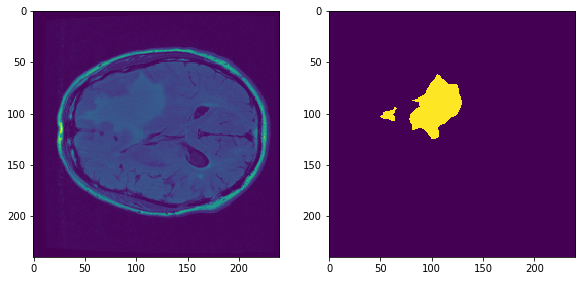

In [226]:
x = 89
fig = plt.figure(figsize = (15, 15))
ax1 = fig.add_subplot(2,3,1)
ax1.imshow(fla_vol[:,:,x])
ax2 = fig.add_subplot(2,3,2)
ax2.imshow(t2all_vol[:,:,x])

### TCGA-06-0240

In [180]:
row = seg_df.iloc[0]
print(row['patient_id'])

TCGA-06-0240


In [181]:
seg_df.head()

,patient_id,seg_loc,seg_file,cohort,patient_exam
0,TCGA-06-0240,/working/lupolab/julia/tcia_analysis/nvidia/ev...,4-AxFLAIR-thin_for_surgery-47036_TC.nii.gz,TCGA-GBM,07-02-2005-04728
1,TCGA-06-0143,/working/lupolab/julia/tcia_analysis/nvidia/ev...,6-AXIAL_FLAIR-72192_TC.nii.gz,TCGA-GBM,02-11-2005-83875
2,TCGA-06-0149,/working/lupolab/julia/tcia_analysis/nvidia/ev...,5-AXIAL_T2_FLAIR-94682_TC.nii.gz,TCGA-GBM,03-25-2003-87536
3,TCGA-19-0955,/working/lupolab/julia/tcia_analysis/nvidia/ev...,3-MRHG_FLAIR_AX-38966_TC.nii.gz,TCGA-GBM,04-07-2001-NR_MRI_BRAIN_WWO-83151
4,TCGA-06-0648,/working/lupolab/julia/tcia_analysis/nvidia/ev...,6-AXIAL_FLAIR-80030_TC.nii.gz,TCGA-GBM,01-20-2006-51419


In [182]:
PATH

PosixPath('/working/lupolab/julia/tcia_analysis/datasets')

In [183]:
seg_file = row['seg_file']

In [184]:
'_'.join(row['seg_file'].split("_")[:-1])

'4-AxFLAIR-thin_for_surgery-47036'

In [186]:
t2all_vol = nib.load(Path(row['seg_loc'],row['seg_file']))
fla_vol = nib.load(Path(PATH, row['cohort']+'-nifti', row['patient_id'], row['patient_exam'], '_'.join(row['seg_file'].split("_")[:-1])+'.nii.gz' ))


In [187]:
fla_vol = np.array(fla_vol.dataobj)
t2all_vol = np.array(t2all_vol.dataobj)


In [188]:
np.where(t2all_vol > 0.5)

(array([63, 63, 63, ..., 89, 89, 89]),
 array([135, 136, 136, ..., 130, 130, 130]),
 array([87, 86, 87, ..., 87, 88, 89]))

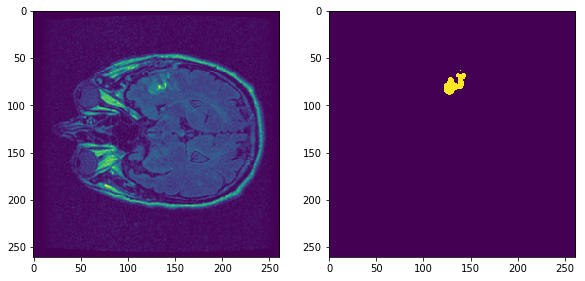

In [194]:
x =85
fig = plt.figure(figsize = (15, 15))
ax1 = fig.add_subplot(2,3,1)
ax1.imshow(fla_vol[:,:,x])
ax2 = fig.add_subplot(2,3,2)
ax2.imshow(t2all_vol[:,:,x])

### TCGA-DU-7309



In [228]:
row = seg_df.iloc[-1]
print(row['patient_id'])

TCGA-DU-7309


In [229]:
seg_file = row['seg_file']

In [230]:
'_'.join(row['seg_file'].split("_")[:-1])

'6-AXIAL_FLAIR-44187'

In [231]:
t2all_vol = nib.load(Path(row['seg_loc'],row['seg_file']))
fla_vol = nib.load(Path(PATH, row['cohort']+'-nifti', row['patient_id'], row['patient_exam'], '_'.join(row['seg_file'].split("_")[:-1])+'.nii.gz' ))


In [232]:
fla_vol = np.array(fla_vol.dataobj)
t2all_vol = np.array(t2all_vol.dataobj)


In [233]:
fla_vol.shape[2]/2

100.0

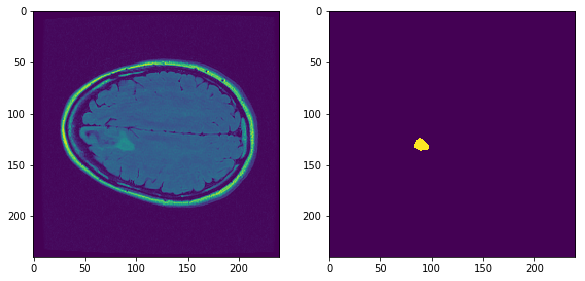

In [236]:
x = 120
fig = plt.figure(figsize = (15, 15))
ax1 = fig.add_subplot(2,3,1)
ax1.imshow(fla_vol[:,:,x])
ax2 = fig.add_subplot(2,3,2)
ax2.imshow(t2all_vol[:,:,x])

### TCGA-06-0240

In [237]:
row = seg_df.iloc[-2]
print(row['patient_id'])

TCGA-HT-7688


In [241]:
seg_file = row['seg_file']

In [242]:
'_'.join(row['seg_file'].split("_")[:-1])

'7-Ax_Flair_irFSE_H-41436'

In [243]:
t2all_vol = nib.load(Path(row['seg_loc'],row['seg_file']))
fla_vol = nib.load(Path(PATH, row['cohort']+'-nifti', row['patient_id'], row['patient_exam'], '_'.join(row['seg_file'].split("_")[:-1])+'.nii.gz' ))


In [244]:
fla_vol = np.array(fla_vol.dataobj)
t2all_vol = np.array(t2all_vol.dataobj)


In [246]:
fla_vol.shape[2]/2

70.0

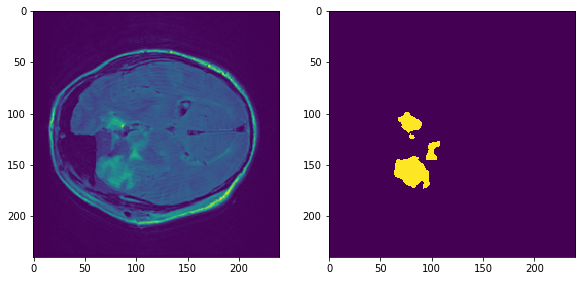

In [247]:
x =70
fig = plt.figure(figsize = (15, 15))
ax1 = fig.add_subplot(2,3,1)
ax1.imshow(fla_vol[:,:,x])
ax2 = fig.add_subplot(2,3,2)
ax2.imshow(t2all_vol[:,:,x])